# Práctica 3. Diseño e implementación de la solución propuesta

## 1. Preprocesamiento y obtención de datos

Primero, importamos los paquetes necesarios y creamos la sesión de Spark.

In [1]:
import json
from pprint import pprint

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

Cargamos los datos de cada mes, conservando los registros con código postal no vacío.

In [3]:
df = spark.read.json('201801_Usage_Bicimad.json')
df1 = df[df['zip_code'] != '']

In [4]:
df = spark.read.json('201802_Usage_Bicimad.json')
df2 = df[df['zip_code'] != '']

In [5]:
df = spark.read.json('201803_Usage_Bicimad.json')
df3 = df[df['zip_code'] != '']

In [6]:
df = spark.read.json('201804_Usage_Bicimad.json')
df4 = df[df['zip_code'] != '']

In [7]:
df = spark.read.json('201805_Usage_Bicimad.json')
df5 = df[df['zip_code'] != '']

In [8]:
df = spark.read.json('201806_Usage_Bicimad.json')
df6 = df[df['zip_code'] != '']

In [9]:
df = spark.read.json('201807_Usage_Bicimad.json')
df7 = df[df['zip_code'] != '']

In [10]:
df = spark.read.json('201808_Usage_Bicimad.json')
df8 = df[df['zip_code'] != '']

In [11]:
df = spark.read.json('201809_Usage_Bicimad.json')
df9 = df[df['zip_code'] != '']

In [12]:
df = spark.read.json('201810_Usage_Bicimad.json')
df10 = df[df['zip_code'] != '']

In [13]:
df = spark.read.json('201811_Usage_Bicimad.json')
df11 = df[df['zip_code'] != '']

In [14]:
df = spark.read.json('201812_Usage_Bicimad.json')
df12 = df[df['zip_code'] != '']

Miramos nombres de columnas de cada dataframe para eliminar las que no sean comunes. Son '_corrupt_record' y 'track'.

In [15]:
df1.columns

['_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [16]:
df2.columns

['_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [17]:
df3.columns

['_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [18]:
df4.columns

['_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [19]:
df5.columns

['_corrupt_record',
 '_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'track',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [20]:
df6.columns

['_corrupt_record',
 '_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'track',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [21]:
df7.columns

['_corrupt_record',
 '_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'track',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [22]:
df8.columns

['_corrupt_record',
 '_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'track',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [23]:
df9.columns

['_corrupt_record',
 '_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'track',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [24]:
df10.columns

['_corrupt_record',
 '_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'track',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [25]:
df11.columns

['_corrupt_record',
 '_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'track',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [26]:
df12.columns

['_corrupt_record',
 '_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'track',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

Miramos cómo son los valores de '_corrupt_record' y 'track'.

In [27]:
df5.groupBy('_corrupt_record').count().show()
df6.groupBy('_corrupt_record').count().show()
df7.groupBy('_corrupt_record').count().show()
df8.groupBy('_corrupt_record').count().show()
df9.groupBy('_corrupt_record').count().show()
df10.groupBy('_corrupt_record').count().show()
df11.groupBy('_corrupt_record').count().show()
df12.groupBy('_corrupt_record').count().show()

+---------------+------+
|_corrupt_record| count|
+---------------+------+
|           null|155022|
+---------------+------+

+---------------+------+
|_corrupt_record| count|
+---------------+------+
|           null|157348|
+---------------+------+

+---------------+------+
|_corrupt_record| count|
+---------------+------+
|           null|177536|
+---------------+------+

+---------------+------+
|_corrupt_record| count|
+---------------+------+
|           null|114403|
+---------------+------+

+---------------+------+
|_corrupt_record| count|
+---------------+------+
|           null|195145|
+---------------+------+

+---------------+------+
|_corrupt_record| count|
+---------------+------+
|           null|166811|
+---------------+------+

+---------------+------+
|_corrupt_record| count|
+---------------+------+
|           null|133357|
+---------------+------+

+---------------+------+
|_corrupt_record| count|
+---------------+------+
|           null|120441|
+---------------+-

In [28]:
df5.groupBy('track').count().show()
df6.groupBy('track').count().show()
df7.groupBy('track').count().show()
df8.groupBy('track').count().show()
df9.groupBy('track').count().show()
df10.groupBy('track').count().show()
df11.groupBy('track').count().show()
df12.groupBy('track').count().show()

+--------------------+-----+
|               track|count|
+--------------------+-----+
|{[{{[-3.689411, 4...|    1|
|{[{{[-3.708827799...|    1|
|{[{{[-3.7016428, ...|    1|
|{[{{[-3.7003045, ...|    1|
|{[{{[-3.717243499...|    1|
|{[{{[-3.673898499...|    1|
|{[{{[-3.7076196, ...|    1|
|{[{{[-3.678504499...|    1|
|{[{{[-3.6774121, ...|    1|
|{[{{[-3.680658999...|    1|
|{[{{[-3.6989496, ...|    1|
|{[{{[-3.7059983, ...|    1|
|{[{{[-3.6873876, ...|    1|
|{[{{[-3.6922068, ...|    1|
|{[{{[-3.678749499...|    1|
|{[{{[-3.693651599...|    1|
|{[{{[-3.700205599...|    1|
|{[{{[-3.6915846, ...|    1|
|{[{{[-3.7101996, ...|    1|
|{[{{[-3.708604999...|    1|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|               track|count|
+--------------------+-----+
|{[{{[-3.6885238, ...|    1|
|{[{{[-3.7106441, ...|    1|
|{[{{[-3.682151099...|    1|
|{[{{[-3.6891386, ...|    1|
|{[{{[-3.719094, 4...|    1|
|{[{{[-3.6882183, ...|    1|
|{[{{[-3.6991621,

Eliminamos columnas '_corrupt_record' y 'track' de los dataframes que la tengan, ya que son columnas que no son comunes al resto de dataframes.

In [29]:
df5 = df5.drop('_corrupt_record')
df6 = df6.drop('_corrupt_record')
df7 = df7.drop('_corrupt_record')
df8 = df8.drop('_corrupt_record')
df9 = df9.drop('_corrupt_record')
df10 = df10.drop('_corrupt_record')
df11 = df11.drop('_corrupt_record')
df12 = df12.drop('_corrupt_record')

df5 = df5.drop('track')
df6 = df6.drop('track')
df7 = df7.drop('track')
df8 = df8.drop('track')
df9 = df9.drop('track')
df10 = df10.drop('track')
df11 = df11.drop('track')
df12 = df12.drop('track')

Unimos los dataframes por estaciones y uno con todos ellos.

In [30]:
df_total = df1.union(df2).union(df3).union(df4).union(df5).union(df6).\
union(df7).union(df8).union(df9).union(df10).union(df11).union(df12)

df_primavera = df3.union(df4).union(df5)
df_verano = df6.union(df7).union(df8)
df_otoño = df9.union(df10).union(df11)
df_invierno = df12.union(df1).union(df2)

Observamos todos los valores de códigos postales que hay:

In [31]:
df_total.toPandas()['zip_code'].unique()

array(['28010', '28005', '28004', '28006', '28012', '28007', '28003',
       '28008', '28028', '28002', '28045', '28015', '28047', '28009',
       '28020', '28014', '28220', '28017', '28016', '28001', '28018',
       '28412', '28040', '28030', '28700', '28921', '28051', '28250',
       '28044', '28053', '28039', '28707', '28013', '28032', '28100',
       '28300', '28760', '28036', '28023', '28034', '28011', '28022',
       '28043', '28922', '28035', '28669', '28400', '28221', '28970',
       '2845', '28021', '28232', '28026', '28590', '28523', '28029',
       '28805', '28105', '34952', '28038', '01710', '28027', '28815',
       '28752', '28224', '18100', '28260', '28042', '280', '28941',
       '28240', '28046', '28230', '28000', '25720', '28521', '280012',
       '28037', '28049', '28031', '28024', '28019', '28109', '28041',
       '2007', '08021', '28222', '49684', '28229',
       'CODIGO_POSTAL_NOT_DEF', '28330', '23038', '28904', '28850',
       '28470', '28934', '47003', '28231', 

Filtramos las observaciones cuyo código postal empiece por '280' (Madrid centro) y que tengan longitud 5 porque hay registros con la codificación mal hecha.

In [32]:
df_total = df_total.filter("zip_code like '280%'")

df_primavera = df_primavera.filter("zip_code like '280%'")
df_verano = df_verano.filter("zip_code like '280%'")
df_otoño = df_otoño.filter("zip_code like '280%'")
df_invierno = df_invierno.filter("zip_code like '280%'")


from pyspark.sql.functions import col, size
from pyspark.sql.functions import length
df_total = df_total.where(length(col("zip_code")) == 5)

df_primavera = df_primavera.where(length(col("zip_code")) == 5)
df_verano = df_verano.where(length(col("zip_code")) == 5)
df_otoño = df_otoño.where(length(col("zip_code")) == 5)
df_invierno = df_invierno.where(length(col("zip_code")) == 5)

Continuamos con la recopilación y limpieza de los datos que vamos a necesitar para crear los mapas.

Comprobamos cómo quedaron los códigos postales:

In [33]:
df_total.toPandas()['zip_code'].unique()

array(['28010', '28005', '28004', '28006', '28012', '28007', '28003',
       '28008', '28028', '28002', '28045', '28015', '28047', '28009',
       '28020', '28014', '28017', '28016', '28001', '28018', '28040',
       '28030', '28051', '28044', '28053', '28039', '28013', '28032',
       '28036', '28023', '28034', '28011', '28022', '28043', '28035',
       '28021', '28026', '28029', '28038', '28027', '28042', '28046',
       '28000', '28037', '28049', '28031', '28024', '28019', '28041',
       '28054', '28050', '28033', '28025', '28064', '28055', '28081',
       '28048', '28060', '28099', '28080', '28072', '28056', '28076',
       '28092'], dtype=object)

Los pasamos a enteros para poder manejarlos fácilmente:

In [34]:
from pyspark.sql.types import IntegerType
df_total = df_total.withColumn("zip_code", df_total["zip_code"].cast(IntegerType()))

df_primavera = df_primavera.withColumn("zip_code", df_primavera["zip_code"].cast(IntegerType()))
df_verano = df_verano.withColumn("zip_code", df_verano["zip_code"].cast(IntegerType()))
df_otoño = df_otoño.withColumn("zip_code", df_otoño["zip_code"].cast(IntegerType()))
df_invierno = df_invierno.withColumn("zip_code", df_invierno["zip_code"].cast(IntegerType()))

Comprobamos que lo hemos hecho bien:

In [35]:
df_total.toPandas()['zip_code'].unique()

array([28010, 28005, 28004, 28006, 28012, 28007, 28003, 28008, 28028,
       28002, 28045, 28015, 28047, 28009, 28020, 28014, 28017, 28016,
       28001, 28018, 28040, 28030, 28051, 28044, 28053, 28039, 28013,
       28032, 28036, 28023, 28034, 28011, 28022, 28043, 28035, 28021,
       28026, 28029, 28038, 28027, 28042, 28046, 28000, 28037, 28049,
       28031, 28024, 28019, 28041, 28054, 28050, 28033, 28025, 28064,
       28055, 28081, 28048, 28060, 28099, 28080, 28072, 28056, 28076,
       28092])

El siguiente paso es la creación del dataframe con el que dibujaremos los círculos correspondientes al número de viajes de cada código postal en los mapas.

A la hora de recopilar información sobre las coordenadas de cada código postal, en un primer momento tratamos de buscar una base de datos en internet.
Esto nos dio problemas ya que había códigos postales distintos con las mismas coordenadas asignadas.

Después de intentar buscar otra base de datos, decidimos coger nosotros mismos las coordenadas utilizando Google Maps y escribirlas a mano, ya que no encontramos una base de datos válida.

Hay ciertos códigos postales que vamos a descartar: en cuanto a los códigos de df_total, el '28000' no corresponde con una zona como tal de Madrid, el '28081' no es un código postal de España (error en la recopilación del dato), y el resto de códigos que hemos decidido eliminar es porque están en las afueras de Madrid, y por tanto se alejan demasiado de nuestro objetivo.

Eliminamos los códigos mencionados:

In [36]:
eliminar = [28000, 28064, 28081, 28060, 28099, 28080, 28072, 28056, 28076, 28092]

for i in eliminar:
    df_total = df_total.where(col("zip_code") != str(i))

    df_primavera = df_primavera.where(col("zip_code") != str(i))
    df_verano = df_verano.where(col("zip_code") != str(i))
    df_otoño = df_otoño.where(col("zip_code") != str(i))
    df_invierno = df_invierno.where(col("zip_code") != str(i))


Estas son las filas del dataframe de los códigos postales y sus coordenadas. El primer dato corresponde con el código, y el segundo y tercero con la longitud y latitud.

In [37]:
filas = [
    [28032, 40.416046, -3.619420],[28036, 40.469561, -3.681427],[28023, 40.459025, -3.780336],[28034, 40.493029, -3.694154],
    [28011, 40.426767, -3.755029],[28022, 40.439251, -3.591673],[28043, 40.459471, -3.645394],[28035, 40.478316, -3.727507],
    [28021, 40.341466, -3.700343],[28026, 40.385539, -3.707637],[28029, 40.475466, -3.700602],[28038, 40.398152, -3.658694],
    [28027, 40.442881, -3.643258],[28042, 40.478737, -3.559575],[28046, 40.450947, -3.691124],[28037, 40.431322, -3.622422],
    [28049, 40.526447, -3.702918],[28031, 40.378103, -3.632432],[28024, 40.385360, -3.795363],[28019, 40.393413, -3.724298],
    [28041, 40.366081, -3.699663],[28054, 40.364556, -3.767419],[28050, 40.497835, -3.663660],[28033, 40.475573, -3.655739],
    [28025, 40.381010, -3.733847],[28055, 40.486995, -3.620806],[28048, 40.517105, -3.794774],[28010, 40.432836, -3.697025],
    [28005, 40.406973, -3.711930],[28006, 40.431905, -3.680317],[28012, 40.409661, -3.698250],[28007, 40.404450, -3.671547],
    [28003, 40.442710, -3.705004],[28008, 40.429634, -3.721431],[28028, 40.430492, -3.662894],[28002, 40.446463, -3.676908],
    [28045, 40.394069, -3.689703],[28015, 40.432652, -3.710637],[28047, 40.394075, -3.748734],[28009, 40.416509, -3.677987],
    [28020, 40.454731, -3.696994],[28014, 40.414001, -3.690007],[28017, 40.427176, -3.645749],[28016, 40.459679, -3.672540],
    [28001, 40.425334, -3.685442],[28018, 40.384687, -3.656220],[28040, 40.446655, -3.725142],[28030, 40.408322, -3.643669],
    [28051, 40.342181, -3.604228],[28044, 40.378409, -3.771484],[28053, 40.373994, -3.671490],[28039, 40.460776, -3.707966],
    [28013, 40.419258, -3.709534]]

Comenzamos con la creación del dataframe que contendrá los códigos postales, sus coordenadas, y más tarde añadiremos el número de viajes según la estación.

In [39]:
import pandas as pd
coordenadas = {'codigo':[''], 'long':[''], 'lat':['']}
df_coord = pd.DataFrame(coordenadas)
df_coord
columns = list(df_coord)
data = []
for row in filas:
    zipped = zip(columns, row)
    a_dictionary = dict(zipped)
    data.append(a_dictionary)
df_coord = df_coord.append(data, True)

Observamos como queda:

In [40]:
df_coord

,codigo,long,lat
0,,,
1,28032,40.416046,-3.61942
2,28036,40.469561,-3.681427
3,28023,40.459025,-3.780336
4,28034,40.493029,-3.694154
5,28011,40.426767,-3.755029
6,28022,40.439251,-3.591673
7,28043,40.459471,-3.645394
8,28035,40.478316,-3.727507
9,28021,40.341466,-3.700343


Eliminamos la fila 0:

In [41]:
df_coord = df_coord.drop(0,axis=0)

## 2. Análisis exploratorio

Realizamos un análisis exploratorio básico de los datos

### 1. Códigos postales con más usuarios

In [42]:
df_total.groupBy('zip_code').count().sort('count',ascending=False).show(5)

+--------+------+
|zip_code| count|
+--------+------+
|   28005|197931|
|   28012|173135|
|   28004|149800|
|   28007|136695|
|   28015|112077|
+--------+------+
only showing top 5 rows



### 2. Duración media de los viajes por código postal

In [43]:
df_total.groupBy('zip_code').agg({'travel_time':'mean'}).show()

+--------+------------------+
|zip_code|  avg(travel_time)|
+--------+------------------+
|   28024| 979.4978902953586|
|   28033| 938.3452782462057|
|   28018| 789.2633914421554|
|   28002| 855.5883400698774|
|   28050|  817.356939163498|
|   28049| 675.3610062893082|
|   28047| 804.4235767326733|
|   28023| 798.6437142857143|
|   28014|  800.145464113533|
|   28001| 984.8596121494463|
|   28036| 842.6295825528499|
|   28015| 768.3167197551684|
|   28031| 942.3908355795148|
|   28030| 963.4438146048683|
|   28040| 836.9220253164557|
|   28017|1022.8672489082969|
|   28021| 721.0980245993292|
|   28025|1070.2041558441558|
|   28037| 775.5272045028142|
|   28007| 815.5250594388968|
+--------+------------------+
only showing top 20 rows



### 3. Número de usuarios por tipo

In [44]:
df_total.groupBy('user_type').count().show()

+---------+-------+
|user_type|  count|
+---------+-------+
|        1|1710476|
|        3|  27779|
|        2|   1045|
+---------+-------+



## 3. Mapas

Damos una explicación de nuestro razonamiento detrás de la creación de los mapas:

Antes de asignar un rango de número de viajes con un color, vemos los histogramas de la cantidad de viajes en cada estación para hacernos una buena idea de cómo hacer esta separación. 
Para ello, tenemos que obtener una lista de los valores que queremos representar en el histograma.

Si observamos las dos celdas siguientes, vemos cómo podríamos acceder a cada elemento de la lista que queremos.
Por tanto, realizaremos un bucle que recorra cada elemento del collect() y añada el valor de 'count' a una lista.

In [45]:
df_total.groupBy('zip_code').count().collect()

[Row(zip_code=28024, count=1896),
 Row(zip_code=28033, count=4744),
 Row(zip_code=28018, count=3155),
 Row(zip_code=28002, count=29194),
 Row(zip_code=28050, count=2104),
 Row(zip_code=28049, count=795),
 Row(zip_code=28047, count=3232),
 Row(zip_code=28023, count=3500),
 Row(zip_code=28014, count=58908),
 Row(zip_code=28001, count=54093),
 Row(zip_code=28036, count=14948),
 Row(zip_code=28015, count=112077),
 Row(zip_code=28031, count=2968),
 Row(zip_code=28030, count=8997),
 Row(zip_code=28040, count=3950),
 Row(zip_code=28017, count=4580),
 Row(zip_code=28021, count=2683),
 Row(zip_code=28025, count=1925),
 Row(zip_code=28037, count=2132),
 Row(zip_code=28007, count=136695),
 Row(zip_code=28027, count=4474),
 Row(zip_code=28034, count=4805),
 Row(zip_code=28022, count=4023),
 Row(zip_code=28051, count=1080),
 Row(zip_code=28039, count=22441),
 Row(zip_code=28009, count=105677),
 Row(zip_code=28010, count=88632),
 Row(zip_code=28005, count=197931),
 Row(zip_code=28045, count=111070),

In [46]:
df_total.groupBy('zip_code').count().collect()[0]['count']

1896

<ipython-input-48-75790608d9c4>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


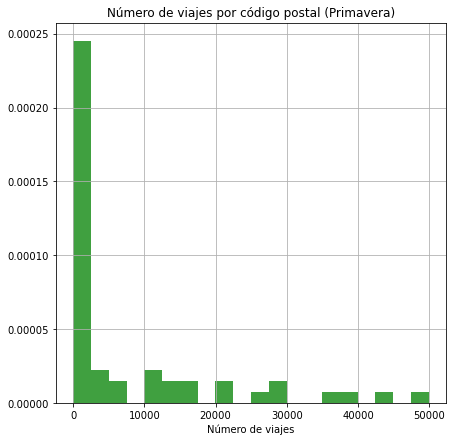

In [48]:
import matplotlib.pyplot as plt
values=[]
for i in range(0,len(df_primavera.groupBy('zip_code').count().collect())):
    values.append(df_primavera.groupBy('zip_code').count().collect()[i]['count'])
values.sort()
fig, ax = plt.subplots(figsize=(7,7))

n, bins, patches = ax.hist(values, 20, density=True, facecolor='g', alpha=0.75)

ax.set_xlabel('Número de viajes')
ax.set_title('Número de viajes por código postal (Primavera)')
ax.grid(True)
fig.show()

<ipython-input-49-b49d35335053>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


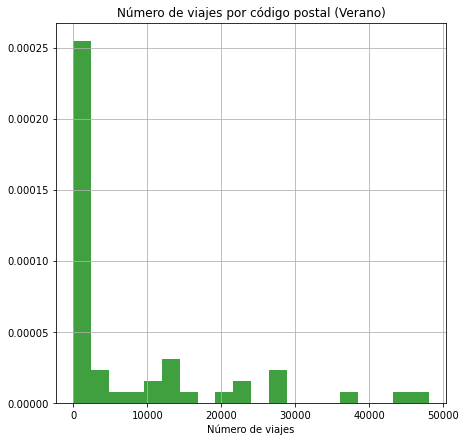

In [49]:
import matplotlib.pyplot as plt
values=[]
for i in range(0,len(df_verano.groupBy('zip_code').count().collect())):
    values.append(df_verano.groupBy('zip_code').count().collect()[i]['count'])
values.sort()
fig, ax = plt.subplots(figsize=(7,7))

n, bins, patches = ax.hist(values, 20, density=True, facecolor='g', alpha=0.75)

ax.set_xlabel('Número de viajes')
ax.set_title('Número de viajes por código postal (Verano)')
ax.grid(True)
fig.show()

<ipython-input-50-c72abe90ff9b>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


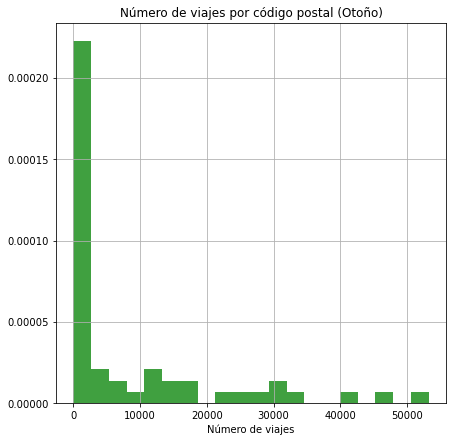

In [50]:
import matplotlib.pyplot as plt
values=[]
for i in range(0,len(df_otoño.groupBy('zip_code').count().collect())):
    values.append(df_otoño.groupBy('zip_code').count().collect()[i]['count'])
values.sort()
fig, ax = plt.subplots(figsize=(7,7))

n, bins, patches = ax.hist(values, 20, density=True, facecolor='g', alpha=0.75)

ax.set_xlabel('Número de viajes')
ax.set_title('Número de viajes por código postal (Otoño)')
ax.grid(True)
fig.show()

<ipython-input-51-da70572cf717>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


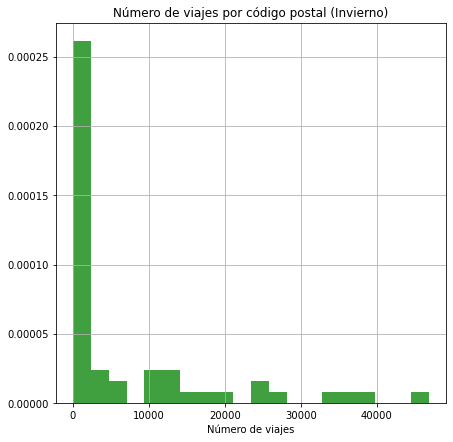

In [51]:
import matplotlib.pyplot as plt
values=[]
for i in range(0,len(df_invierno.groupBy('zip_code').count().collect())):
    values.append(df_invierno.groupBy('zip_code').count().collect()[i]['count'])
values.sort()
fig, ax = plt.subplots(figsize=(7,7))

n, bins, patches = ax.hist(values, 20, density=True, facecolor='g', alpha=0.75)

ax.set_xlabel('Número de viajes')
ax.set_title('Número de viajes por código postal (Invierno)')
ax.grid(True)
fig.show()

Explicamos la conclusión a la que llegamos sobre los colores en el documento escrito.

El siguiente paso es crear los mapas.
Vamos a crear un mapa por cada estación para así poder obtener conclusiones y poder diseñar un plan de mejora.

In [52]:
import folium

In [53]:
df_coord

,codigo,long,lat
1,28032,40.416046,-3.61942
2,28036,40.469561,-3.681427
3,28023,40.459025,-3.780336
4,28034,40.493029,-3.694154
5,28011,40.426767,-3.755029
6,28022,40.439251,-3.591673
7,28043,40.459471,-3.645394
8,28035,40.478316,-3.727507
9,28021,40.341466,-3.700343
10,28026,40.385539,-3.707637


Este es el dataframe con el que vamos a trabajar. Nuestro objetivo ahora va a ser tener 4 nuevas columnas (una por cada estación), con el número de viajes correspondiente a ese código postal en cada estación.

Para ello, decidimos pasar los datos que queremos a cuatro listas para que se tarde menos en la ejecución cuando tratemos con ellos.
La siguiente celda se encarga de esto mismo:

In [54]:
lista_primavera = []
n = len(df_primavera.groupBy('zip_code').count().collect())
for i in range(0,n):
    lista_primavera.append([df_primavera.groupBy('zip_code').count().collect()[i]['zip_code'],
                      df_primavera.groupBy('zip_code').count().collect()[i]['count']])

lista_verano = []
n = len(df_verano.groupBy('zip_code').count().collect())
for i in range(0,n):
    lista_verano.append([df_verano.groupBy('zip_code').count().collect()[i]['zip_code'],
                      df_verano.groupBy('zip_code').count().collect()[i]['count']])

lista_otoño = []
n = len(df_otoño.groupBy('zip_code').count().collect())
for i in range(0,n):
    lista_otoño.append([df_otoño.groupBy('zip_code').count().collect()[i]['zip_code'],
                      df_otoño.groupBy('zip_code').count().collect()[i]['count']])
    
lista_invierno = []
n = len(df_invierno.groupBy('zip_code').count().collect())
for i in range(0,n):
    lista_invierno.append([df_invierno.groupBy('zip_code').count().collect()[i]['zip_code'],
                      df_invierno.groupBy('zip_code').count().collect()[i]['count']])

Ahora creamos las listas vacías, que luego al rellenarlas serán las columnas que buscamos.

In [55]:
count_primavera = []
count_verano = []
count_otoño = []
count_invierno = []
        
for i in df_coord['codigo'].values:
    len_primavera = len(count_primavera)
    for j in lista_primavera:
        if i in j:
            count_primavera.append(j[1])
        else:
            pass
    if len_primavera == len(count_primavera):
        count_primavera.append(0)
df_coord['count_primavera'] = count_primavera

for i in df_coord['codigo'].values:
    len_verano = len(count_verano)
    for j in lista_verano:
        if i in j:
            count_verano.append(j[1])
        else:
            pass
    if len_verano == len(count_verano):
        count_verano.append(0)
df_coord['count_verano'] = count_verano

for i in df_coord['codigo'].values:
    len_otoño = len(count_otoño)
    for j in lista_otoño:
        if i in j:
            count_otoño.append(j[1])
        else:
            pass
    if len_otoño == len(count_otoño):
        count_otoño.append(0)
df_coord['count_otoño'] = count_otoño

for i in df_coord['codigo'].values:
    len_invierno = len(count_invierno)
    for j in lista_invierno:
        if i in j:
            count_invierno.append(j[1])
        else:
            pass
    if len_invierno == len(count_invierno):
        count_invierno.append(0)
df_coord['count_invierno'] = count_invierno

Este es el dataframe resultante:

In [56]:
df_coord

,codigo,long,lat,count_primavera,count_verano,count_otoño,count_invierno
1,28032,40.416046,-3.61942,305,417,472,352
2,28036,40.469561,-3.681427,3786,3365,4143,3654
3,28023,40.459025,-3.780336,979,884,891,746
4,28034,40.493029,-3.694154,1213,1201,1334,1057
5,28011,40.426767,-3.755029,2565,2977,3333,2172
6,28022,40.439251,-3.591673,812,1059,1266,886
7,28043,40.459471,-3.645394,1085,1074,1315,1061
8,28035,40.478316,-3.727507,888,962,908,782
9,28021,40.341466,-3.700343,794,714,531,644
10,28026,40.385539,-3.707637,1676,1535,1745,1338


Habiendo hecho esto con éxito, podemos dibujar los mapas con sus círculos.
Como título dentro de cada círculo, hemos incluido el número de viajes correspondiente.
Así, tan solo mirando el mapa, se puede obtener una buena idea de la demanda de viajes en bici por zonas en cada estación.

### 1. Mapa Primavera

In [57]:
m = folium.Map(location=[40.426403, -3.695662], zoom_start=13)

for i in range(1,len(df_coord['codigo'].values)+1):
    if df_coord['count_primavera'][i] != 0:
        if df_coord['count_primavera'][i] > 40000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_primavera'][i]),
                color="red",
                fill=True,
            ).add_to(m)
        elif df_coord['count_primavera'][i] > 30000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_primavera'][i]),
                color="orange",
                fill=True,
            ).add_to(m)
        elif df_coord['count_primavera'][i] > 20000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_primavera'][i]),
                color="yellow",
                fill=True,
            ).add_to(m)
        elif df_coord['count_primavera'][i] > 10000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_primavera'][i]),
                color="blue",
                fill=True,
            ).add_to(m)
        elif df_coord['count_primavera'][i] > 500:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_primavera'][i]),
                color="green",
                fill=True,
            ).add_to(m)
        else:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_primavera'][i]),
                color="grey",
                fill=True,
            ).add_to(m) 
    else:
        pass
        
m

### 2. Mapa Verano

In [58]:
m = folium.Map(location=[40.426403, -3.695662], zoom_start=13)

for i in range(1,len(df_coord['codigo'].values)+1):
    if df_coord['count_verano'][i] != 0:
        if df_coord['count_verano'][i] > 40000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_verano'][i]),
                color="red",
                fill=True,
            ).add_to(m)
        elif df_coord['count_verano'][i] > 30000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_verano'][i]),
                color="orange",
                fill=True,
            ).add_to(m)
        elif df_coord['count_verano'][i] > 20000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_verano'][i]),
                color="yellow",
                fill=True,
            ).add_to(m)
        elif df_coord['count_verano'][i] > 10000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_verano'][i]),
                color="blue",
                fill=True,
            ).add_to(m)
        elif df_coord['count_verano'][i] > 500:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_verano'][i]),
                color="green",
                fill=True,
            ).add_to(m)
        else:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_verano'][i]),
                color="grey",
                fill=True,
            ).add_to(m) 
    else:
        pass
        
m

### 3. Mapa Otoño

In [59]:
m = folium.Map(location=[40.426403, -3.695662], zoom_start=13)

for i in range(1,len(df_coord['codigo'].values)+1):
    if df_coord['count_otoño'][i] != 0:
        if df_coord['count_otoño'][i] > 40000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_otoño'][i]),
                color="red",
                fill=True,
            ).add_to(m)
        elif df_coord['count_otoño'][i] > 30000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_otoño'][i]),
                color="orange",
                fill=True,
            ).add_to(m)
        elif df_coord['count_otoño'][i] > 20000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_otoño'][i]),
                color="yellow",
                fill=True,
            ).add_to(m)
        elif df_coord['count_otoño'][i] > 10000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_otoño'][i]),
                color="blue",
                fill=True,
            ).add_to(m)
        elif df_coord['count_otoño'][i] > 500:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_otoño'][i]),
                color="green",
                fill=True,
            ).add_to(m)
        else:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_otoño'][i]),
                color="gray",
                fill=True,
            ).add_to(m) 
    else:
        pass
        
m

### 4. Mapa Invierno

In [1]:
m = folium.Map(location=[40.426403, -3.695662], zoom_start=13)

for i in range(1,len(df_coord['codigo'].values)+1):
    if df_coord['count_invierno'][i] != 0:
        if df_coord['count_invierno'][i] > 40000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_invierno'][i]),
                color="red",
                fill=True,
            ).add_to(m)
        elif df_coord['count_invierno'][i] > 30000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_invierno'][i]),
                color="orange",
                fill=True,
            ).add_to(m)
        elif df_coord['count_invierno'][i] > 20000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_invierno'][i]),
                color="yellow",
                fill=True,
            ).add_to(m)
        elif df_coord['count_invierno'][i] > 10000:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_invierno'][i]),
                color="blue",
                fill=True,
            ).add_to(m)
        elif df_coord['count_invierno'][i] > 500:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_invierno'][i]),
                color="green",
                fill=True,
            ).add_to(m)
        else:
            folium.CircleMarker(
                radius=15,
                location=[df_coord['long'][i], df_coord['lat'][i]],
                popup=str(df_coord['count_invierno'][i]),
                color="gray",
                fill=True,
            ).add_to(m) 
    else:
        pass
        
m

NameError: name 'folium' is not defined

### 5. Datos de interés para el análisis de los mapas (detallado en el documento)

Cantidad total de viajes en cada estación:

In [84]:
print(str('Nº viajes primavera: ')+str(sum(df_coord['count_primavera'])))
print(str('Nº viajes verano: ')+str(sum(df_coord['count_verano'])))
print(str('Nº viajes otoño: ')+str(sum(df_coord['count_otoño'])))
print(str('Nº viajes invierno: ')+str(sum(df_coord['count_invierno']))) 

Nº viajes primavera: 401654
Nº viajes verano: 387026
Nº viajes otoño: 427445
Nº viajes invierno: 373375


Código postal que siempre tiene intensidad roja:

In [85]:
df_coord[df_coord['count_invierno']==46828]['codigo']

29    28005
Name: codigo, dtype: object

Otros códigos que serán de interés en el análisis son:

In [86]:
print(df_coord[df_coord['count_invierno']==14168]['codigo'])
print(df_coord[df_coord['count_invierno']==10486]['codigo'])
print(df_coord[df_coord['count_invierno']==13571]['codigo'])
print(df_coord[df_coord['count_invierno']==12255]['codigo'])

42    28014
Name: codigo, dtype: object
53    28013
Name: codigo, dtype: object
34    28008
Name: codigo, dtype: object
45    28001
Name: codigo, dtype: object


El resto del análisis y conclusiones obtenidas de los mapas se detallan en el documento escrito.